This project uses provided TV, radio and newspaper to predict sales revenue by scikit-learn.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
advert.drop(['Unnamed: 0'], axis=1, inplace=True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


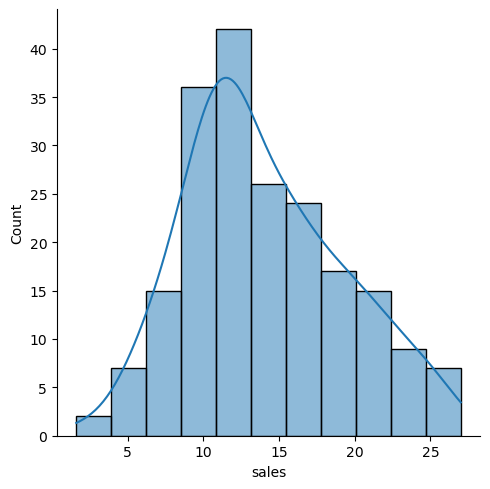

In [7]:
import seaborn as sns
sns.displot(advert.sales, kde=True)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


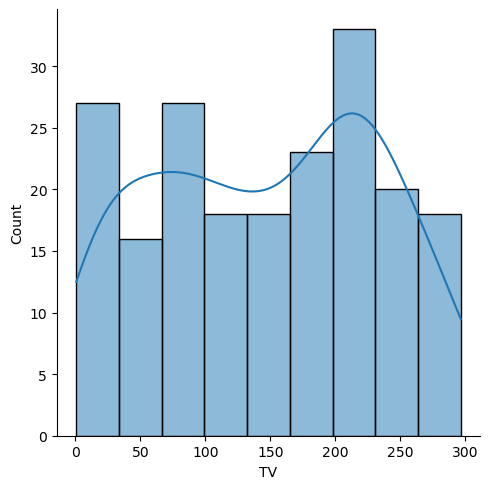

In [8]:
sns.displot(advert.TV, kde=True)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


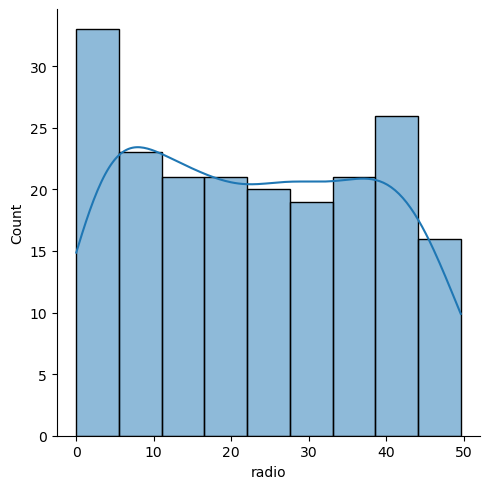

In [9]:
sns.displot(advert.radio, kde=True)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


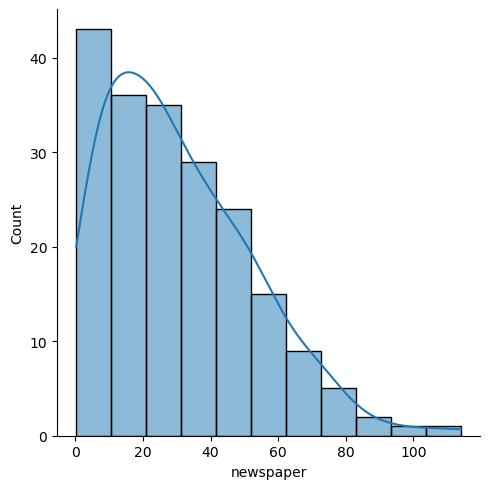

In [10]:
sns.displot(advert.newspaper, kde=True)

Check the correlation between TV to sales, radio to sales and newspaper to sales respectively. And the analysis below shows that the number of TV is the most correlated item to sales.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


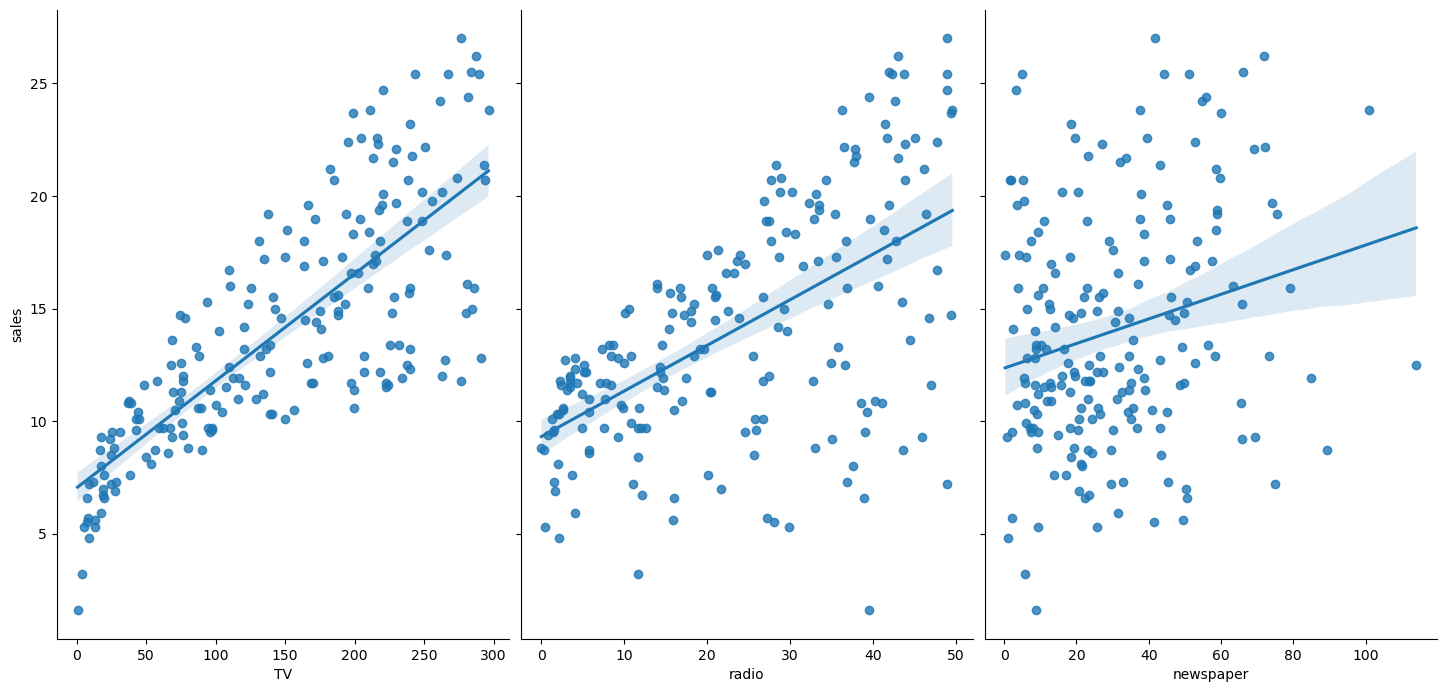

In [11]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [12]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [13]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

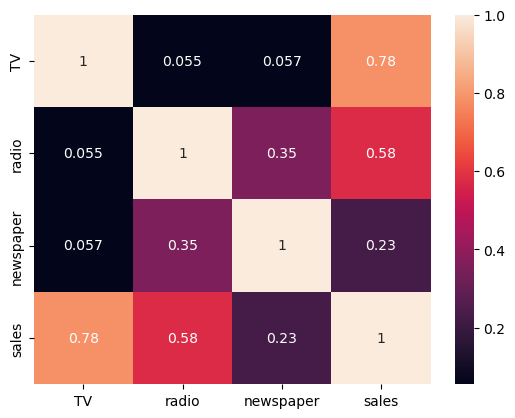

In [14]:
sns.heatmap(advert.corr(), annot=True)

In [15]:
x = advert[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [18]:
y = advert.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [21]:
# can see the default separate ratio is 3:1
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [23]:
print(linreg.intercept_)
print(linreg.coef_)

6.91197261886872
[0.04802945]


In [25]:
# make predictions and return ndarray
y_pred = linreg.predict(x_test)
print(type(y_pred))
print(y_pred[:5])

<class 'numpy.ndarray'>
[17.03658069 16.63793625 11.50839099 20.36982452 19.10184704]


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: 
$$\frac{1}{n}\sum \limits_{i=1}^{n}\left\lvert{{y_i} - \hat{y_i}}\right\rvert$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n}\sum \limits_{i=1}^{n} ({y_i} - \hat{y_i})^2$$

**Root Mean Squared Error** (RMSE) is the suqare root of the mean of the errors:
$$\sqrt{\frac{1}{n}\sum \limits_{i=1}^{n} ({y_i} - \hat{y_i})^2}$$

In [28]:
# model evaluation
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.4643080986027908
10.310069587813155
3.210929707703542
